In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

In [2]:
data = pd.read_csv('Dataset/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
required_cols = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[required_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

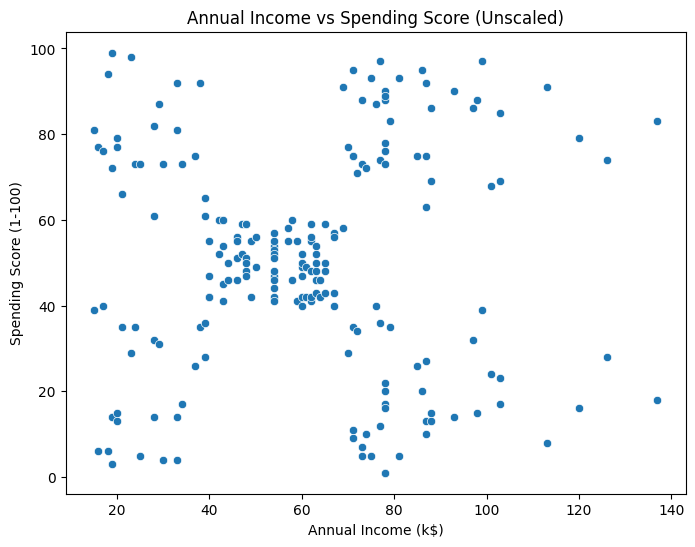

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'])
plt.title('Annual Income vs Spending Score (Unscaled)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.savefig('income_vs_spending.png')
plt.show()

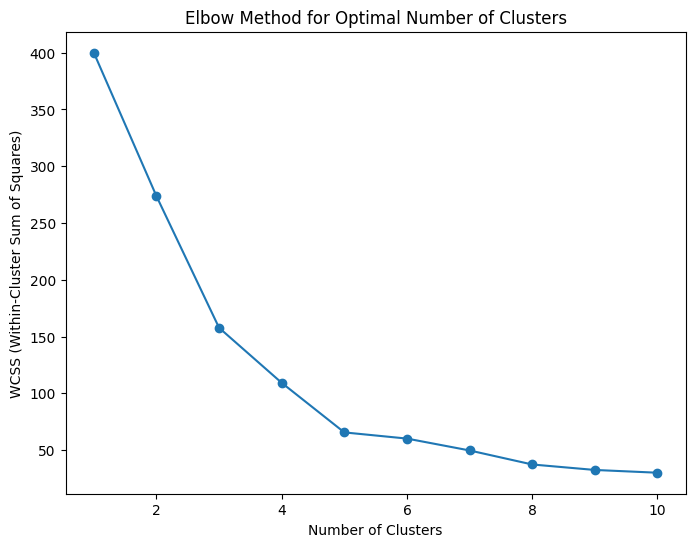

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.savefig('elbow_method.png')
plt.show()

In [9]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

cluster_analysis = data.groupby('KMeans_Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).reset_index()

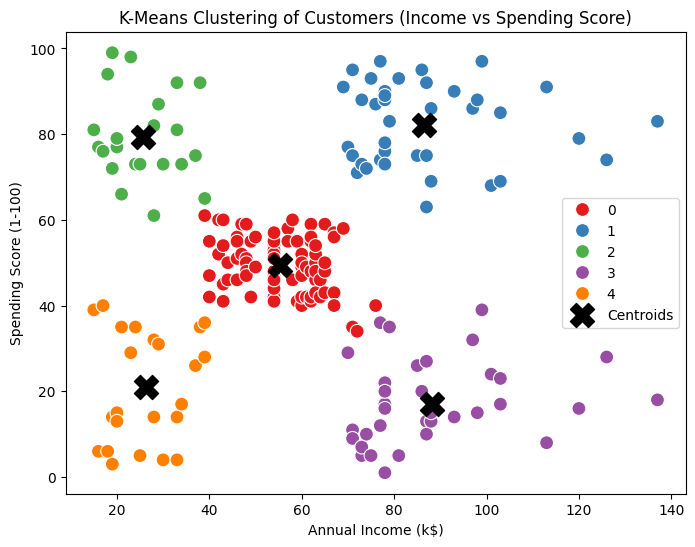

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', 
                palette='Set1', data=data, s=100)
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0], 
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1], 
            s=300, c='black', marker='X', label='Centroids')
plt.title('K-Means Clustering of Customers (Income vs Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.savefig('kmeans_clusters.png')
plt.show()

In [11]:
kmeans_cluster_analysis = data.groupby('KMeans_Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Cluster Size'}).reset_index()

print("\nK-Means Cluster Analysis:")
print(kmeans_cluster_analysis)



K-Means Cluster Analysis:
   KMeans_Cluster  Annual Income (k$)  Spending Score (1-100)  Cluster Size
0               0           55.296296               49.518519            81
1               1           86.538462               82.128205            39
2               2           25.727273               79.363636            22
3               3           88.200000               17.114286            35
4               4           26.304348               20.913043            23


C:\Users\yahya\AppData\Local\Temp\ipykernel_3472\3520846013.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='KMeans_Cluster', y='Spending Score (1-100)', data=cluster_analysis, palette='Set2')


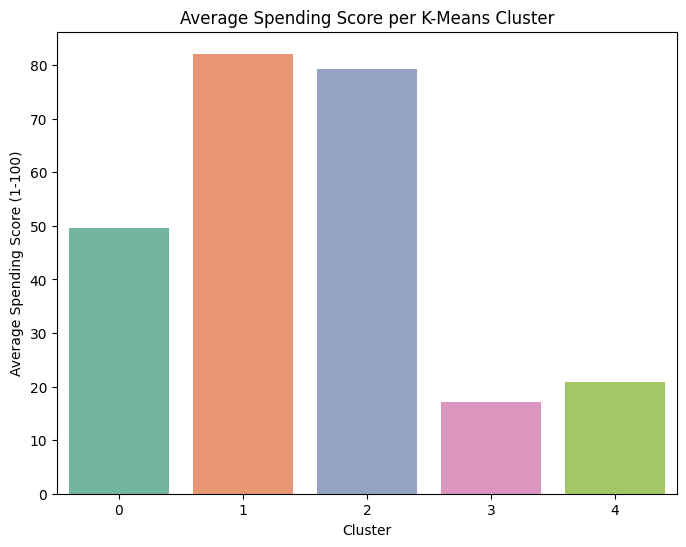

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(x='KMeans_Cluster', y='Spending Score (1-100)', data=cluster_analysis, palette='Set2')
plt.title('Average Spending Score per K-Means Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Spending Score (1-100)')
plt.savefig('average_spending_per_cluster.png')
plt.show()

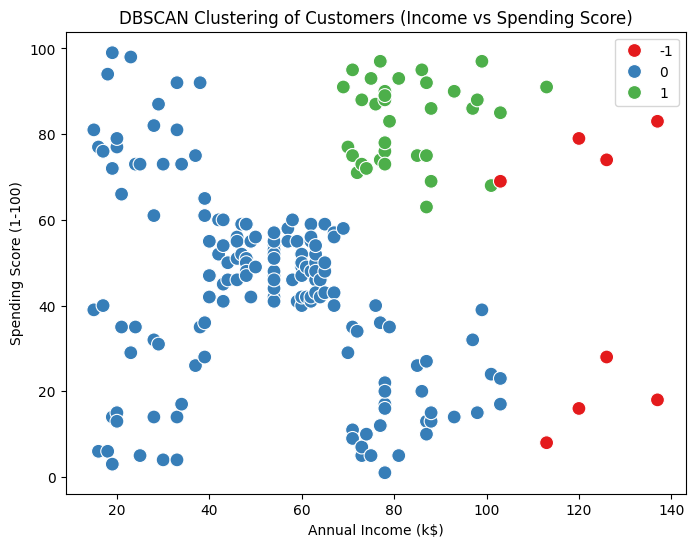

In [13]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', 
                palette='Set1', data=data, s=100)
plt.title('DBSCAN Clustering of Customers (Income vs Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.savefig('dbscan_clusters.png')
plt.show()

In [14]:
dbscan_cluster_analysis = data[data['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Cluster Size'}).reset_index()

print("\nDBSCAN Cluster Analysis (Excluding Noise):")
print(dbscan_cluster_analysis)



DBSCAN Cluster Analysis (Excluding Noise):
   DBSCAN_Cluster  Annual Income (k$)  Spending Score (1-100)  Cluster Size
0               0           52.490446               43.101911           157
1               1           82.542857               82.800000            35


C:\Users\yahya\AppData\Local\Temp\ipykernel_3472\1467201531.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DBSCAN_Cluster', y='Spending Score (1-100)', data=dbscan_cluster_analysis, palette='Set2')


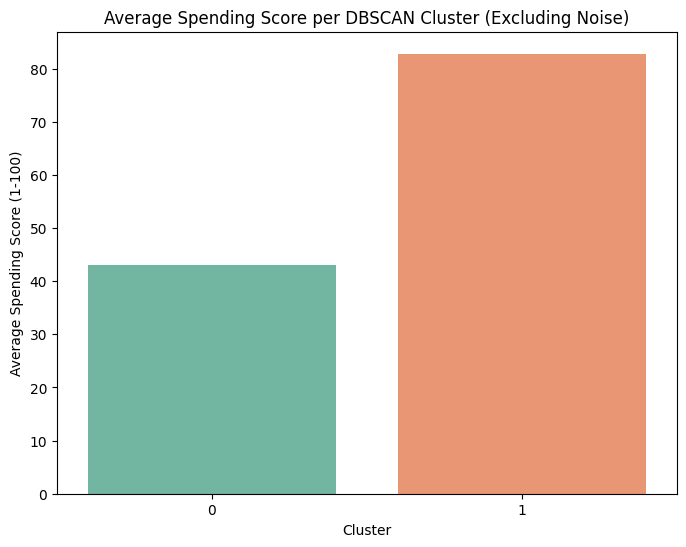

In [15]:
dbscan_cluster_analysis = data[data['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='DBSCAN_Cluster', y='Spending Score (1-100)', data=dbscan_cluster_analysis, palette='Set2')
plt.title('Average Spending Score per DBSCAN Cluster (Excluding Noise)')
plt.xlabel('Cluster')
plt.ylabel('Average Spending Score (1-100)')
plt.savefig('average_spending_per_dbscan_cluster.png')
plt.show()